In [40]:
import os
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
import seaborn as sns

In [41]:
def count(file_path):
    with open(file_path, 'rb') as f:
       return  pkl.load(f)

In [42]:
def relation_proportions(triples):
    """
    Calculate the percentage of each relation used in a set of triples.

    Parameters:
        triples (np.ndarray): A numpy array of shape (number of triples, 3).
        total_relations (int): Total number of possible relations (default is 237).

    Returns:
        dict: A dictionary with relation IDs as keys and their proportions (in %) as values.
    """
    # Extract relations from the triples
    relations = triples[:, 1]

    # Count occurrences of each relation
    unique, counts = np.unique(relations, return_counts=True)

    # Calculate proportions
    proportions = {relation: (count / len(relations)) * 100 for relation, count in zip(unique, counts)}

    return proportions

def analyze_splits(ood_test, easy_test, test, train):
    """
    Analyze the proportion of relations in each split.

    Parameters:
        train (np.ndarray): Train triples of shape (number of triples, 3).
        valid (np.ndarray): Validation triples of shape (number of triples, 3).
        test (np.ndarray): Test triples of shape (number of triples, 3).
        total_relations (int): Total number of possible relations (default is 237).

    Returns:
        dict: A dictionary with split names as keys and relation proportion dictionaries as values.
    """
    return {
        "ood_test": relation_proportions(ood_test),
        "easy_test": relation_proportions(easy_test),
        "test": relation_proportions(test),
        "train": relation_proportions(train)
    }

def plot_relation_proportions(proportions, split_name):
    """
    Plots the relation proportions as a bar chart for a given split.

    Parameters:
        proportions (dict): A dictionary where keys are relation IDs and values are their proportions (in %).
        split_name (str): Name of the split (e.g., 'train', 'valid', 'test').
    """
    # Extract relation IDs and proportions
    relation_ids = list(proportions.keys())
    relation_percents = list(proportions.values())
    
    # Create the bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(relation_ids, relation_percents, alpha=0.7, color='blue')
    
    # Add titles and labels
    plt.title(f'Relation Proportions in {split_name.capitalize()} Split', fontsize=16)
    plt.xlabel('Relation ID', fontsize=14)
    plt.ylabel('Proportion (%)', fontsize=14)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if many relations exist
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

def plot_all_splits(splits_proportions):
    """
    Plots the relation proportions for all splits.

    Parameters:
        splits_proportions (dict): A dictionary where keys are split names ('train', 'valid', 'test')
                                   and values are dictionaries of relation proportions.
    """
    for split_name, proportions in splits_proportions.items():
        plot_relation_proportions(proportions, split_name)


def plot_relation_proportions_heatmap(splits_proportions):
    """
    Plots a heatmap of relation proportions for all splits.

    Parameters:
        splits_proportions (dict): A dictionary where keys are split names ('train', 'valid', 'test')
                                   and values are dictionaries of relation proportions.
    """
    # Convert the splits_proportions into a DataFrame
    data = pd.DataFrame.from_dict(splits_proportions, orient='index').fillna(0)  # Fill missing relations with 0
    
    # Plot the heatmap
    plt.figure(figsize=(20, 8))  # Adjust the figure size for readability
    sns.heatmap(data, cmap="Blues", linewidths=0.5, linecolor='gray', annot=False)
    
    # Add titles and labels
    plt.title("Relation Proportions Across Splits", fontsize=16)
    plt.xlabel("Relation ID", fontsize=14)
    plt.ylabel("Split", fontsize=14)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


def plot_split_heatmap(split_name, proportions):
    """
    Plots a heatmap of relation proportions for a single split with a color bar.

    Parameters:
        split_name (str): The name of the split (e.g., 'train', 'test').
        proportions (dict): A dictionary where keys are relation IDs and values are their proportions (in %).
    """
    # Convert the proportions dictionary to a DataFrame
    data = pd.DataFrame.from_dict(proportions, orient='index', columns=['Proportion']).sort_index()
    
    # Plot the heatmap
    plt.figure(figsize=(20, 4))  # Adjust figure size
    sns.heatmap(data.T, cmap="Blues", linewidths=0.5, linecolor='gray', annot=False, fmt=".2f", cbar=True)
    
    # Add titles and labels
    plt.title(f"Relation Proportions in {split_name.capitalize()} Split", fontsize=16)
    plt.xlabel("Relation ID", fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def plot_all_splits_heatmap_separately(splits_proportions):
    """
    Plots heatmaps with a color bar for all splits separately.

    Parameters:
        splits_proportions (dict): A dictionary where keys are split names (e.g., 'train', 'test') 
                                   and values are relation proportion dictionaries.
    """
    for split_name, proportions in splits_proportions.items():
        plot_split_heatmap(split_name, proportions)



# WN18RR #

In [49]:
data = count("/hkfs/work/workspace/scratch/st_st177261-Theeb/KGEmb/data/WN18RR/newdata.pickle")
ood_test = data["ood_test"]
easy_test = data["easy_test"]
test = count("/hkfs/work/workspace/scratch/st_st177261-Theeb/KGEmb/data/WN18RR/test.pickle")
train = count("/hkfs/work/workspace/scratch/st_st177261-Theeb/KGEmb/data/WN18RR/train.pickle")

ood_relations = set()
easy_relations = set()
test_relations = set()
train_relations = set()

for h , r, t in ood_test:
    ood_relations.add(r)

for h , r, t in easy_test:
    easy_relations.add(r)

for h , r, t in test:    
    test_relations.add(r)

for h , r, t in train:
    train_relations.add(r)

print(f"ood test: {ood_relations} , lenght: {len(ood_relations)}")
print(f"easy test: {easy_relations} , lenght: {len(easy_relations)}")
print(f"test: {test_relations} , lenght: {len(test_relations)}")
print(f"train: {train_relations} , lenght: {len(train_relations)}")


ood test: {0, 1, 2, 3, 4, 5, 6, 7, 9, 10} , lenght: 10
easy test: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10} , lenght: 11
test: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10} , lenght: 11
train: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10} , lenght: 11


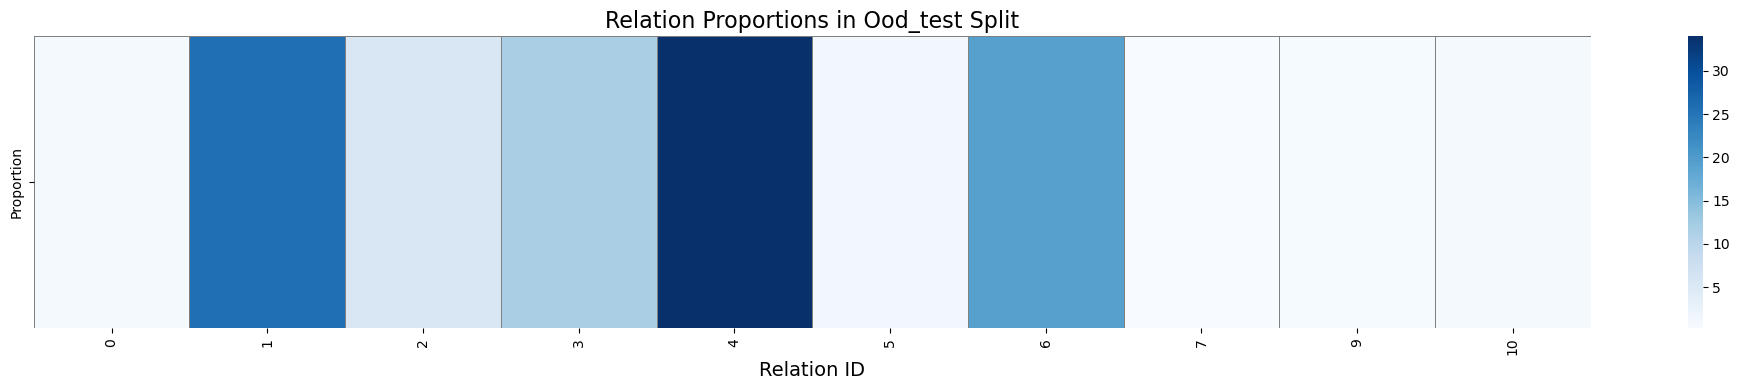

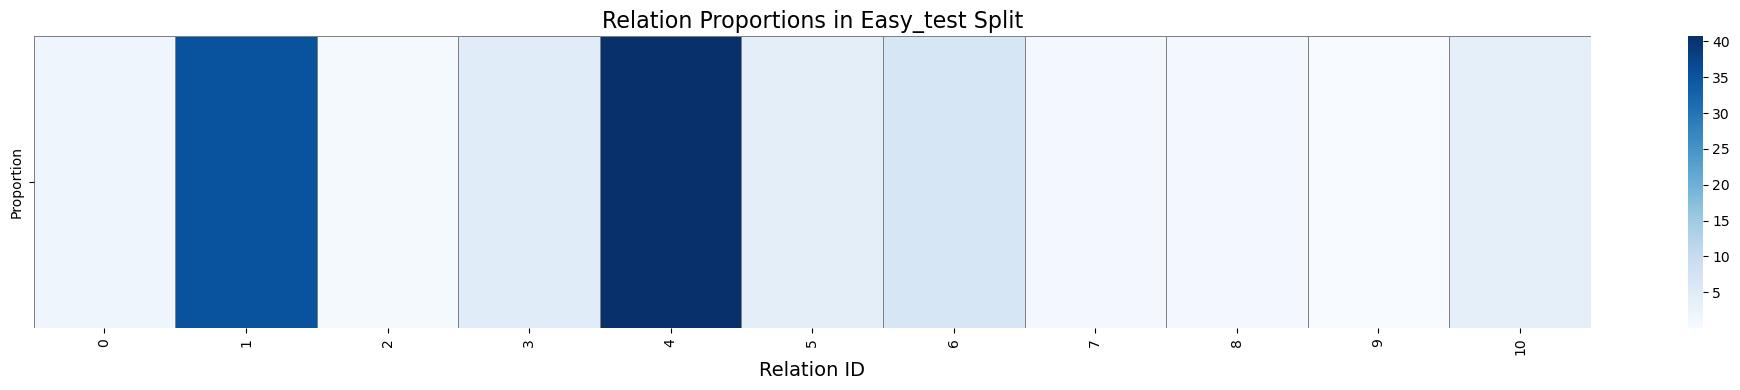

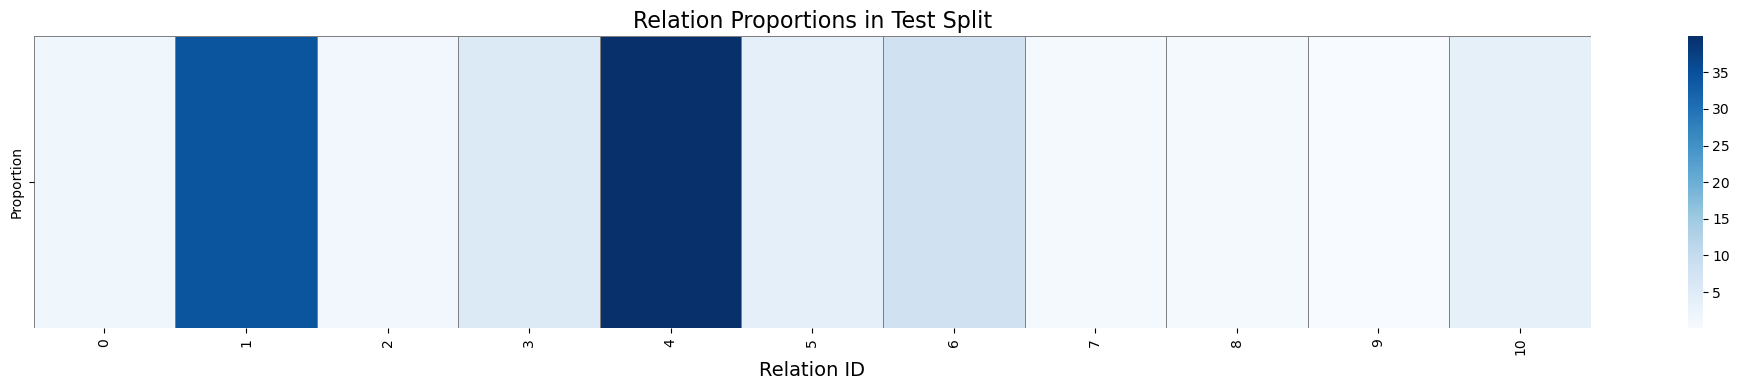

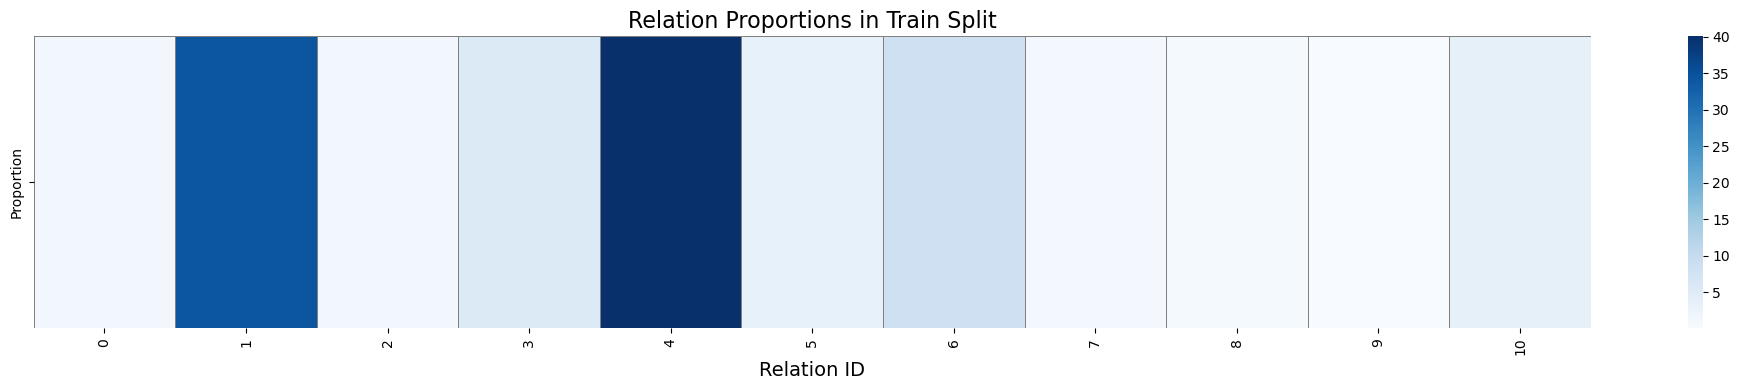

In [50]:
z = analyze_splits(ood_test, easy_test, test, train)

plot_all_splits_heatmap_separately(z)

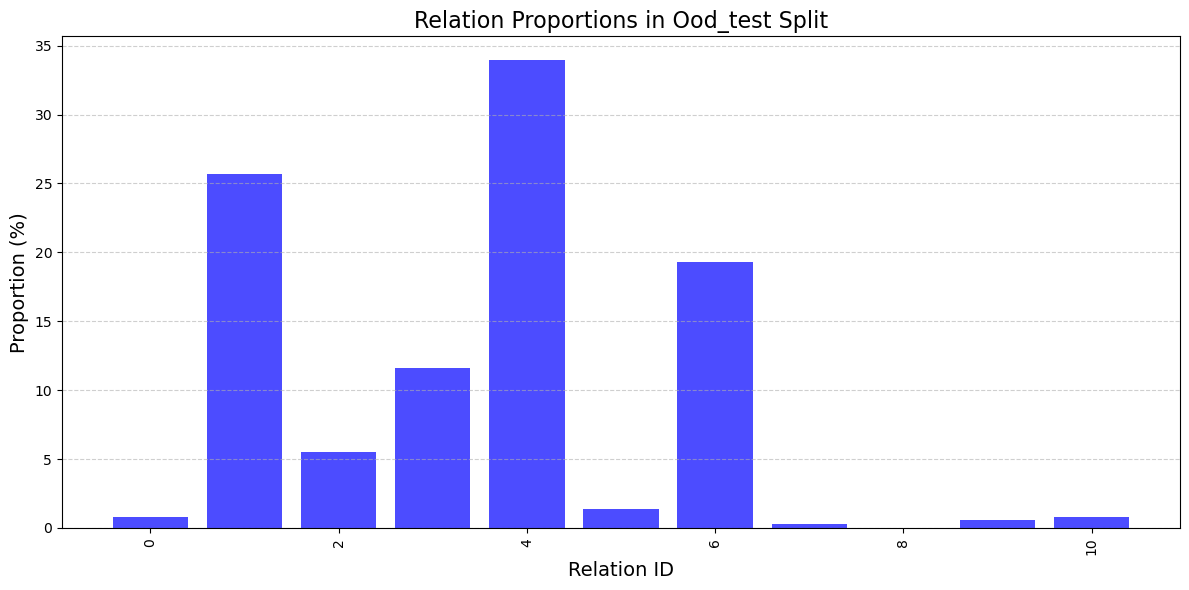

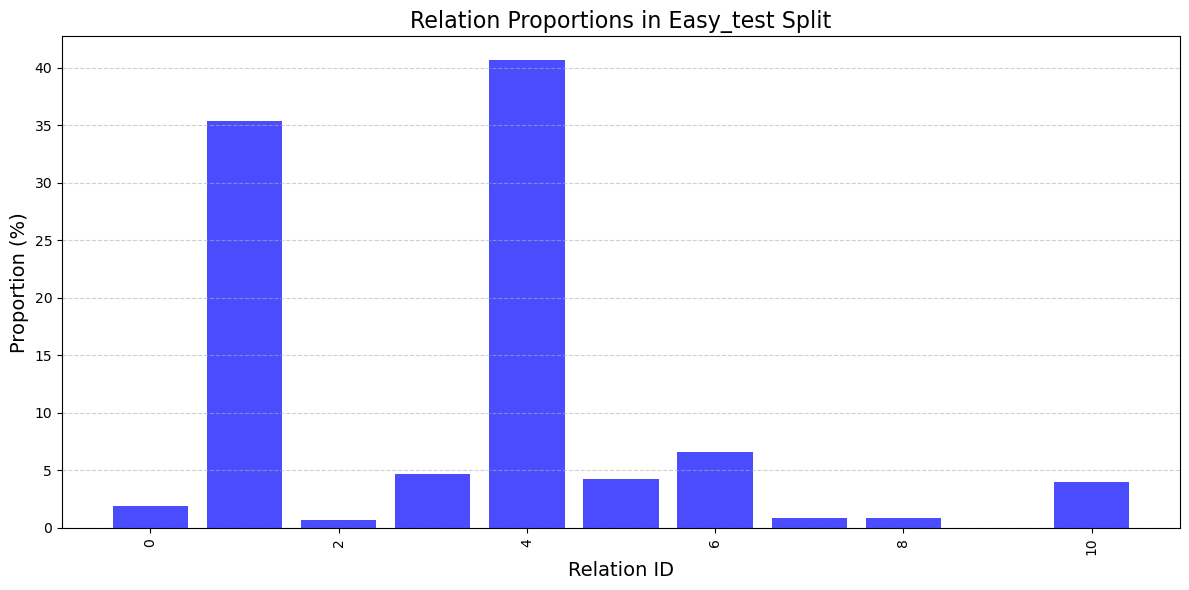

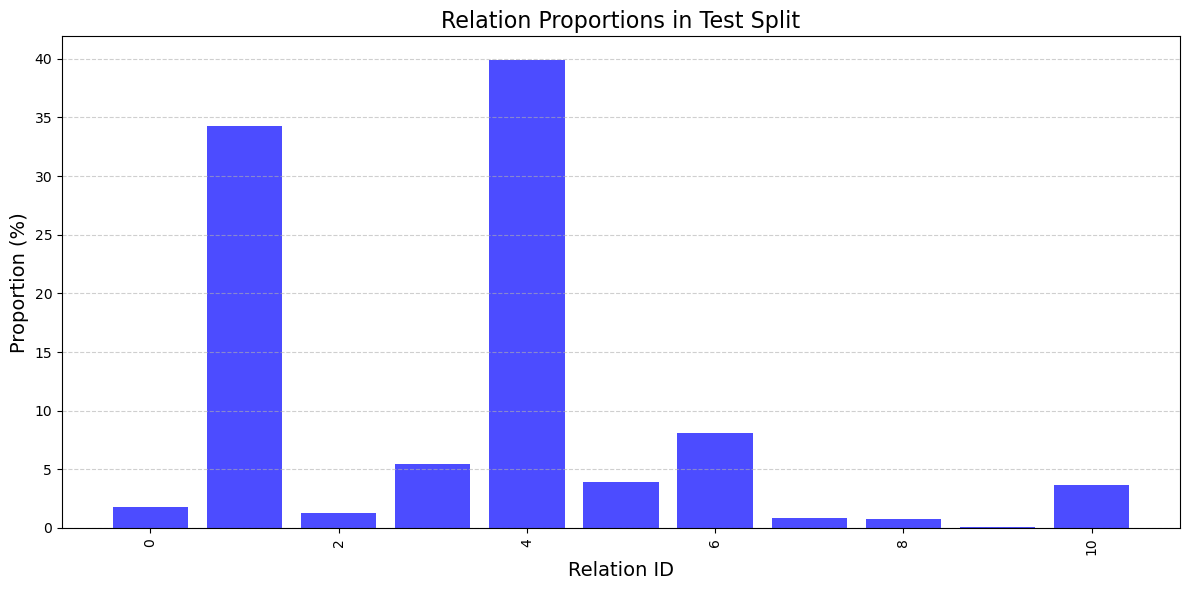

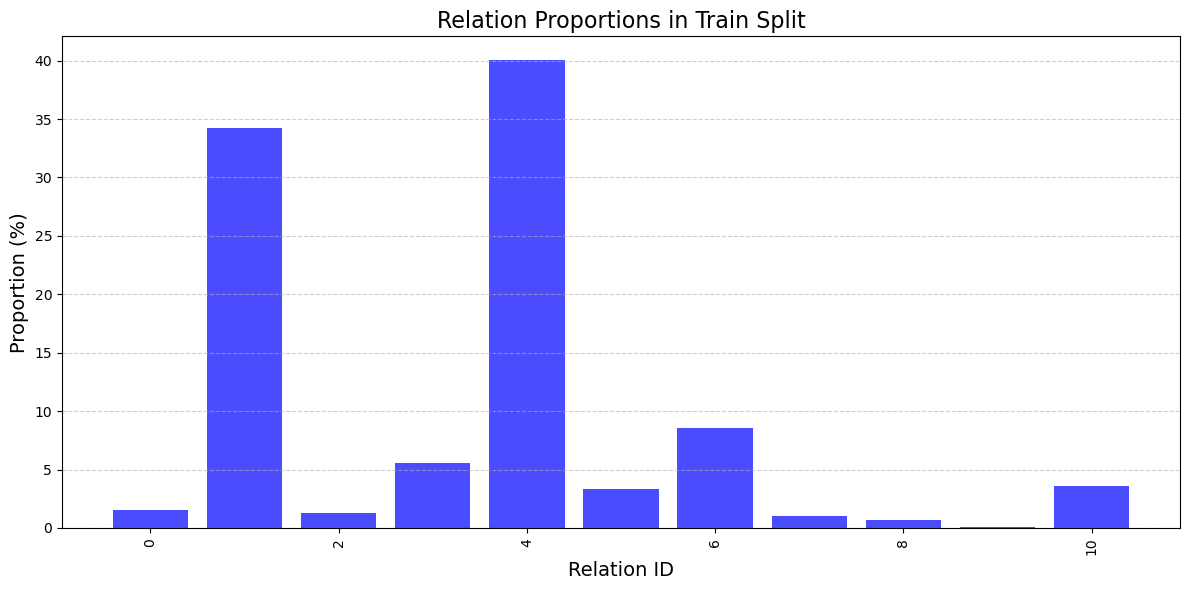

In [51]:
x = analyze_splits(ood_test, easy_test, test, train)

plot_all_splits(x)

# FB237 #


In [52]:
data = count("/hkfs/work/workspace/scratch/st_st177261-Theeb/KGEmb/data/FB237/newdata.pickle")
ood_test = data["ood_test"]
easy_test = data["easy_test"]
test = count("/hkfs/work/workspace/scratch/st_st177261-Theeb/KGEmb/data/FB237/test.pickle")
train = count("/hkfs/work/workspace/scratch/st_st177261-Theeb/KGEmb/data/FB237/train.pickle")

ood_relations = set()
easy_relations = set()
test_relations = set()
train_relations = set()
ood_relations_not_used = set()
easy_relations_not_used = set()
test_relations_not_used = set()

for h , r, t in ood_test:
    ood_relations.add(r)

for h , r, t in easy_test:
    easy_relations.add(r)

for h , r, t in test:    
    test_relations.add(r)

for h , r, t in train:
    train_relations.add(r)

for i in range(237):
    if i not in ood_relations:
        ood_relations_not_used.add(i)
    if i not in easy_relations:
        easy_relations_not_used.add(i)
    if i not in test_relations:
        test_relations_not_used.add(i)

print(f"ood test: {ood_relations} , lenght: {len(ood_relations)}")
print(f"easy test: {easy_relations} , lenght: {len(easy_relations)}")
print(f"test: {test_relations} , lenght: {len(test_relations)}")
print(f"train: {train_relations} , lenght: {len(train_relations)}")
print(f"ood not used: {ood_relations_not_used} , lenght: {len(ood_relations_not_used)}")
print(f"easy not used: {easy_relations_not_used} , lenght: {len(easy_relations_not_used)}")
print(f"test not used: {test_relations_not_used} , lenght: {len(test_relations_not_used)}")


ood test: {1, 131, 132, 5, 133, 13, 14, 142, 16, 145, 147, 19, 149, 22, 26, 154, 30, 31, 33, 162, 83, 36, 165, 164, 171, 45, 179, 52, 54, 184, 57, 59, 188, 60, 192, 194, 67, 196, 202, 207, 208, 81, 80, 82, 84, 85, 214, 215, 216, 88, 212, 91, 220, 223, 96, 224, 227, 228, 100, 102, 229, 101, 105, 106, 107, 236, 109, 235, 118} , lenght: 69
easy test: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 1

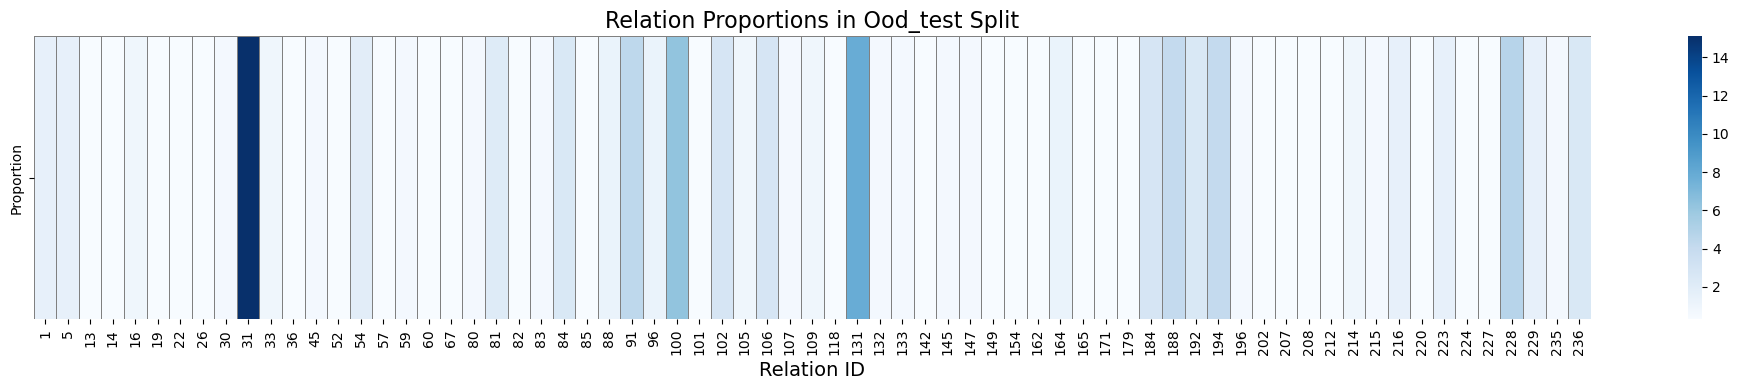

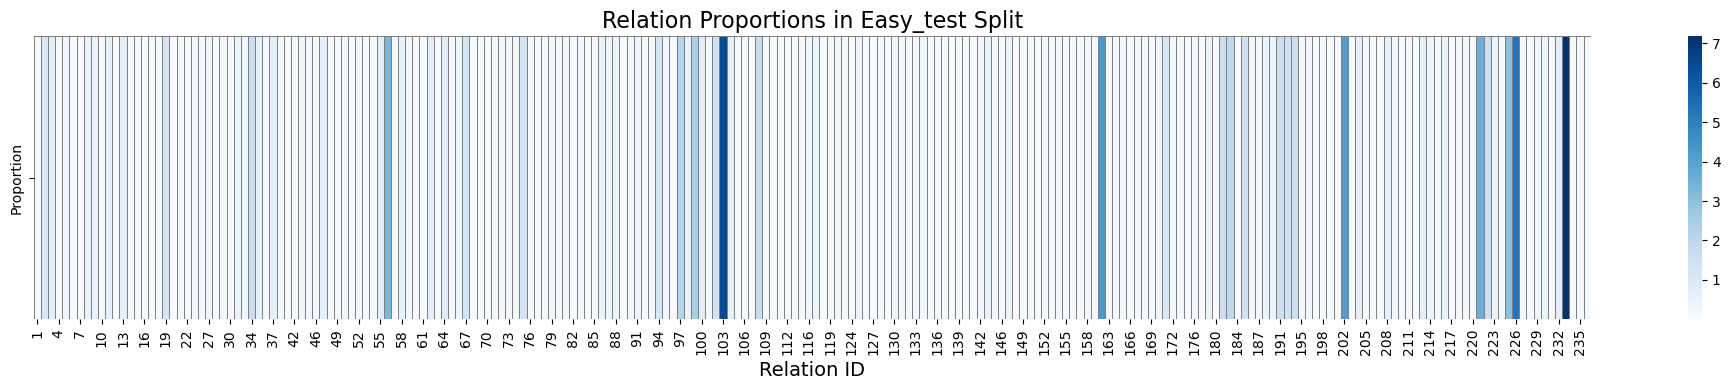

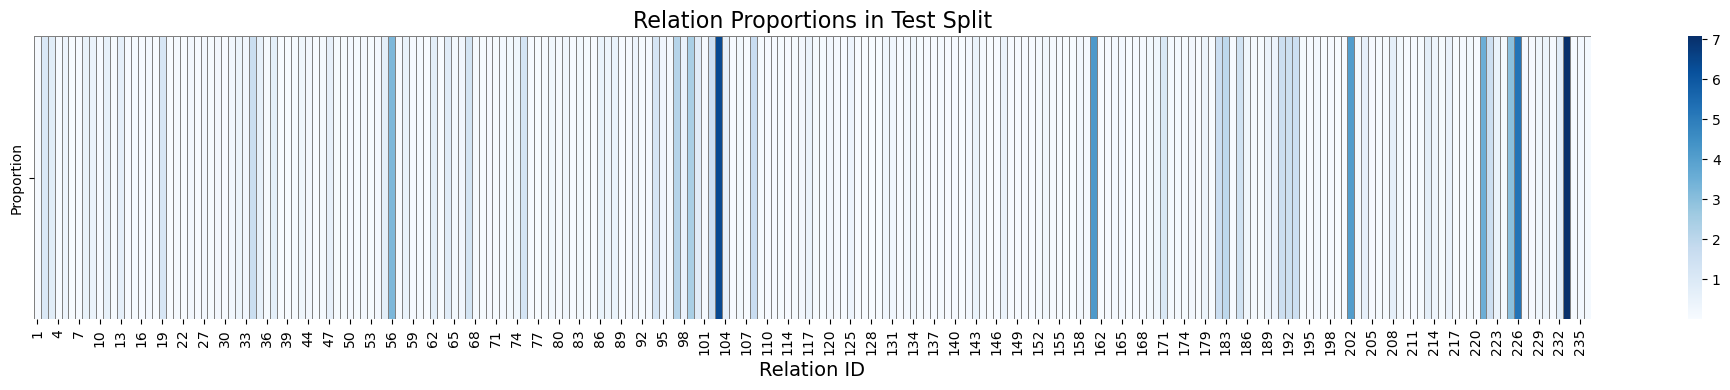

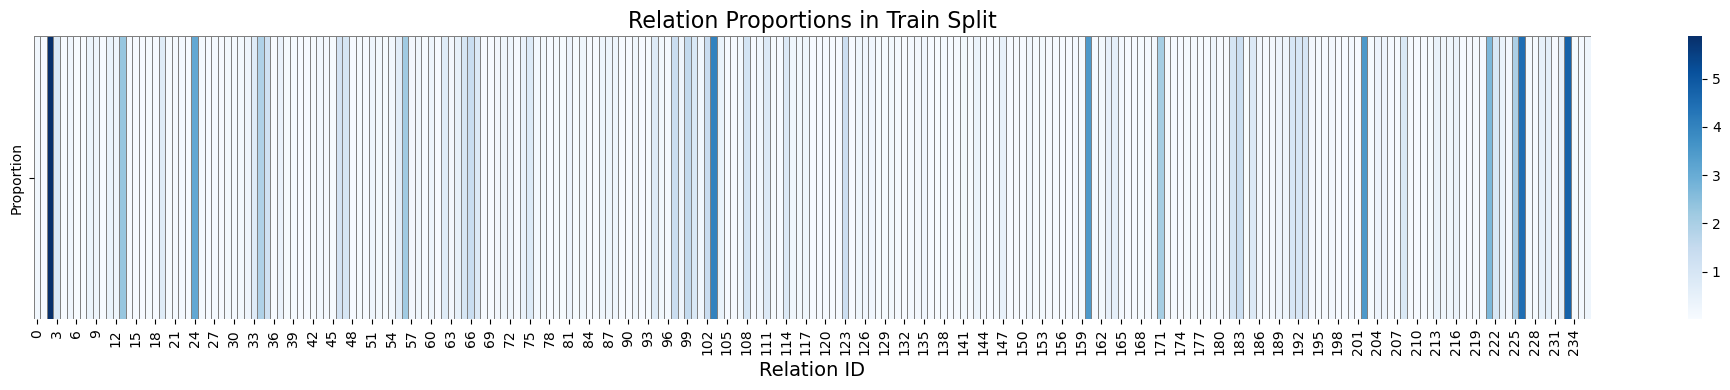

In [53]:
z = analyze_splits(ood_test, easy_test, test, train)

plot_all_splits_heatmap_separately(z)

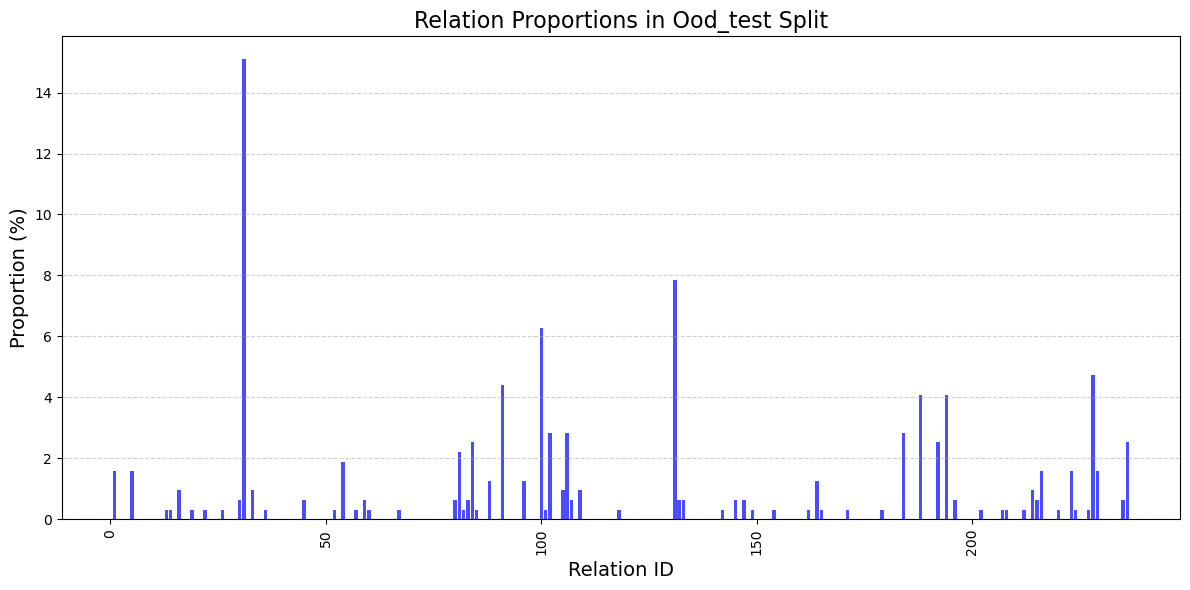

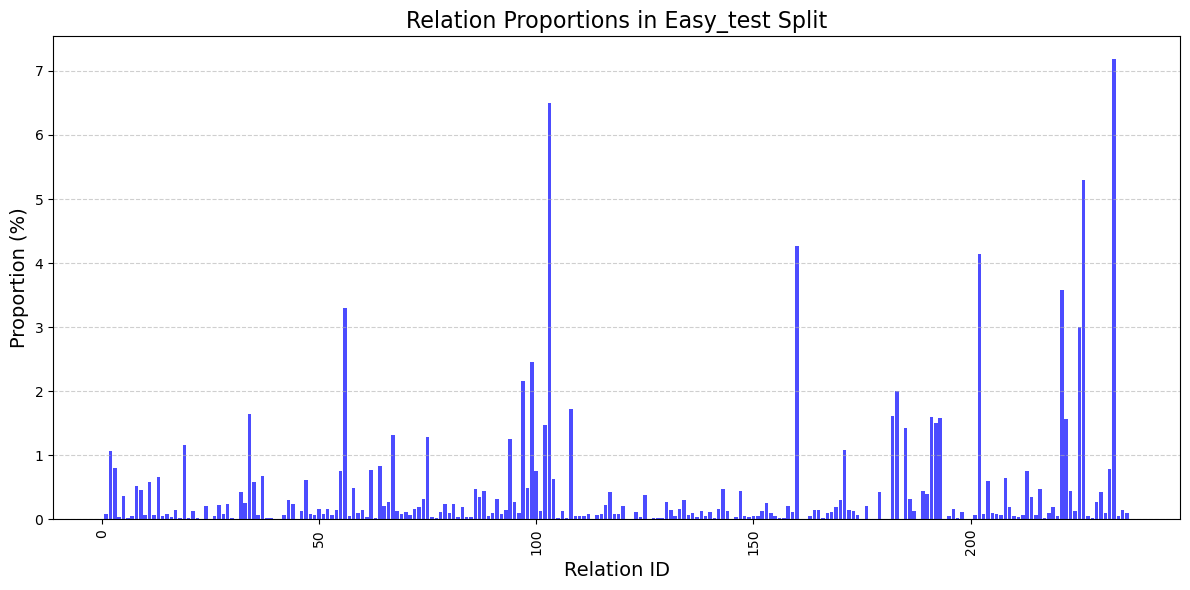

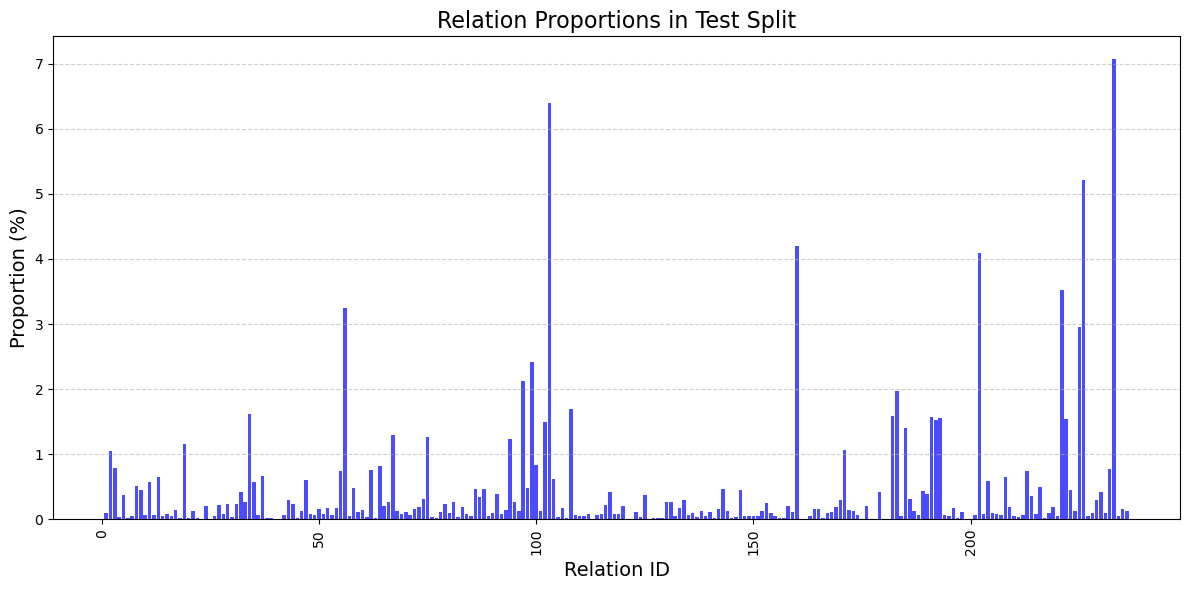

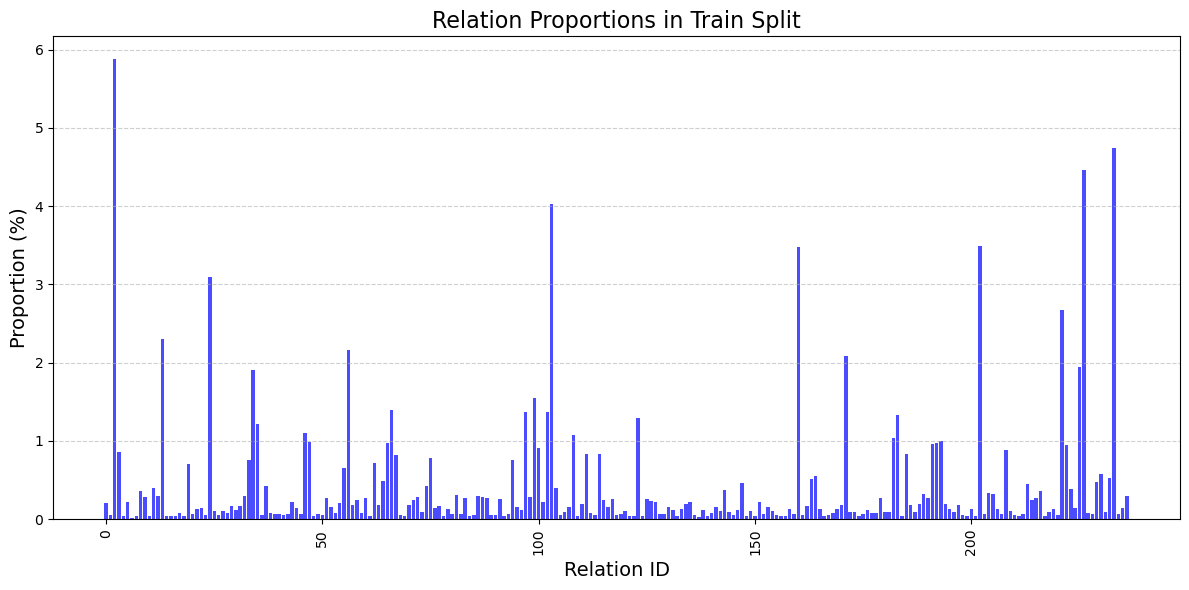

In [54]:
x = analyze_splits(ood_test, easy_test, test, train)

plot_all_splits(x)

# YAGO3-10 #

In [58]:
data = count("/hkfs/work/workspace/scratch/st_st177261-Theeb/KGEmb/data/YAGO3-10/newdata.pickle")
ood_test = data["ood_test"]
easy_test = data["easy_test"]
test = count("/hkfs/work/workspace/scratch/st_st177261-Theeb/KGEmb/data/YAGO3-10/test.pickle")
train = count("/hkfs/work/workspace/scratch/st_st177261-Theeb/KGEmb/data/YAGO3-10/train.pickle")

ood_relations = set()
easy_relations = set()
test_relations = set()
train_relations = set()
ood_relations_not_used = set()
easy_relations_not_used = set()
test_relations_not_used = set()

for h , r, t in ood_test:
    ood_relations.add(r)

for h , r, t in easy_test:
    easy_relations.add(r)

for h , r, t in test:    
    test_relations.add(r)

for h , r, t in train:
    train_relations.add(r)

for i in range(37):
    if i not in ood_relations:
        ood_relations_not_used.add(i)
    if i not in easy_relations:
        easy_relations_not_used.add(i)
    if i not in test_relations:
        test_relations_not_used.add(i)

print(f"ood test: {ood_relations} , lenght: {len(ood_relations)}")
print(f"easy test: {easy_relations} , lenght: {len(easy_relations)}")
print(f"test: {test_relations} , lenght: {len(test_relations)}")
print(f"train: {train_relations} , lenght: {len(train_relations)}")
print(f"ood not used: {ood_relations_not_used} , lenght: {len(ood_relations_not_used)}")
print(f"easy not used: {easy_relations_not_used} , lenght: {len(easy_relations_not_used)}")
print(f"test not used: {test_relations_not_used} , lenght: {len(test_relations_not_used)}")


ood test: {1, 2, 34, 3, 36, 13, 19, 20, 21, 23, 24, 25, 28, 31} , lenght: 14
easy test: {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36} , lenght: 34
test: {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36} , lenght: 34
train: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36} , lenght: 37
ood not used: {0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 22, 26, 27, 29, 30, 32, 33, 35} , lenght: 23
easy not used: {18, 11, 4} , lenght: 3
test not used: {18, 11, 4} , lenght: 3


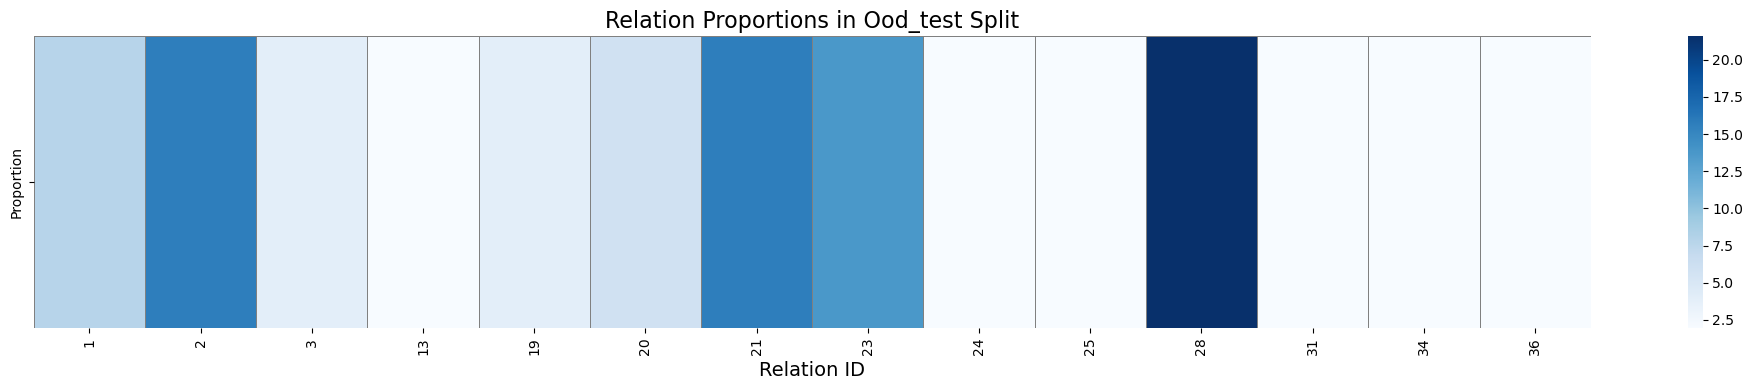

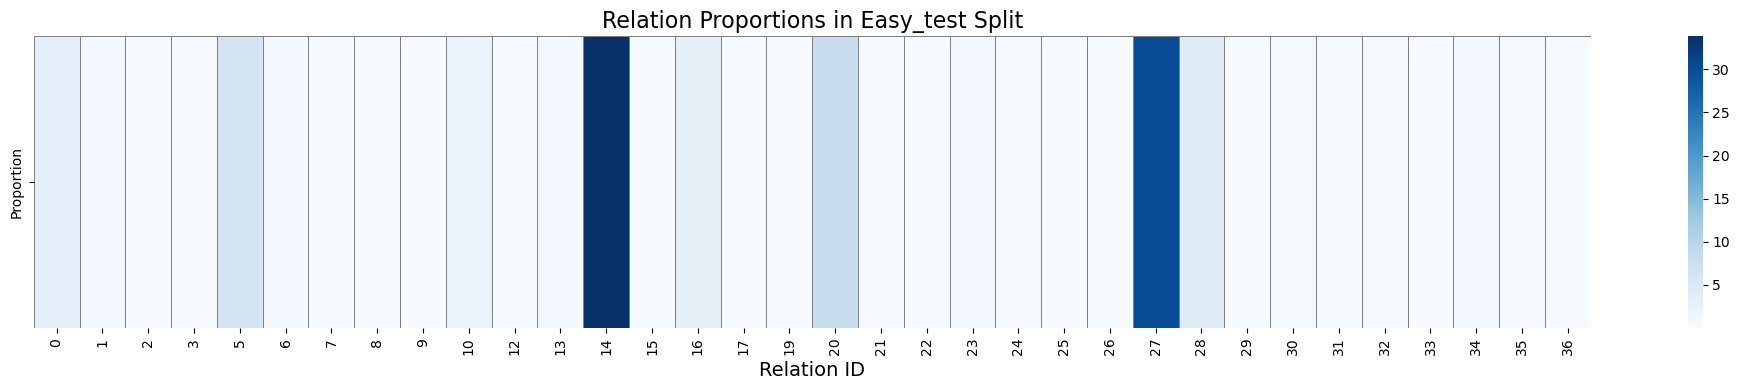

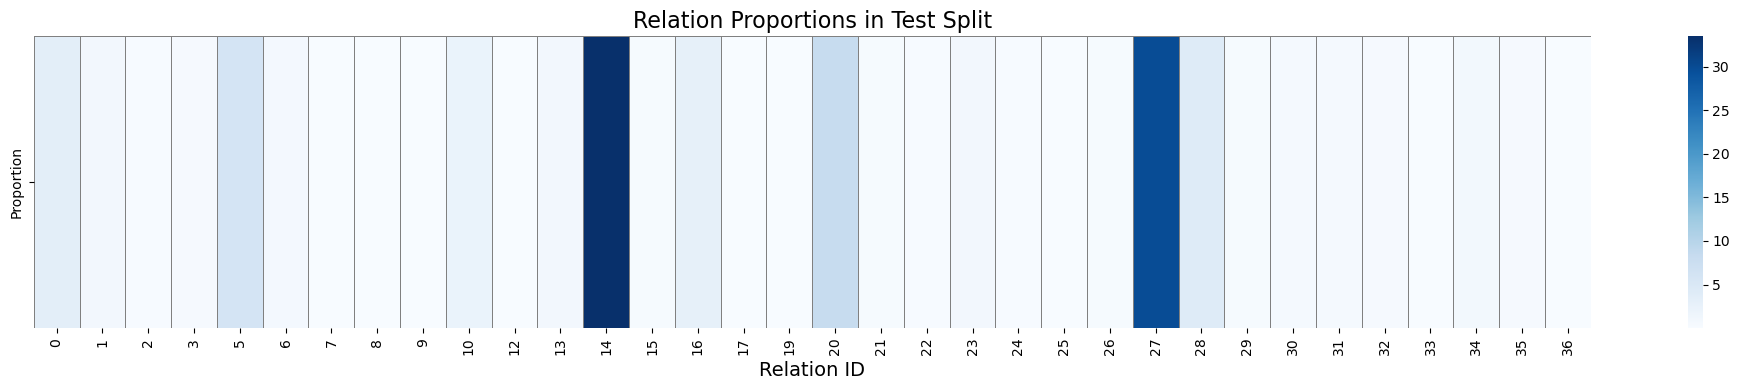

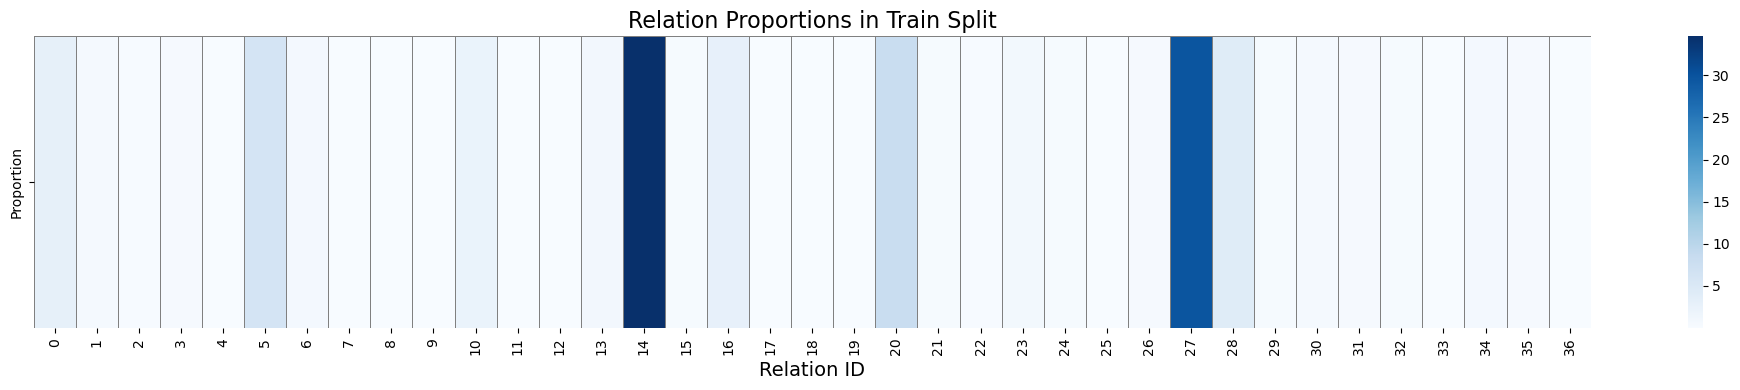

In [59]:
z = analyze_splits(ood_test, easy_test, test, train)

plot_all_splits_heatmap_separately(z)

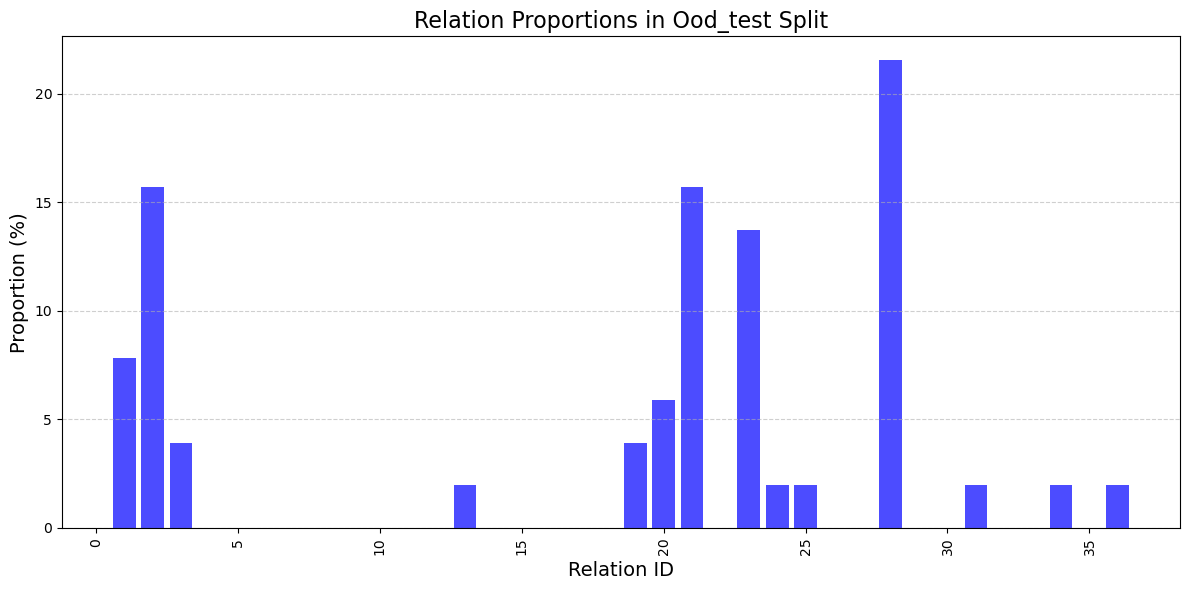

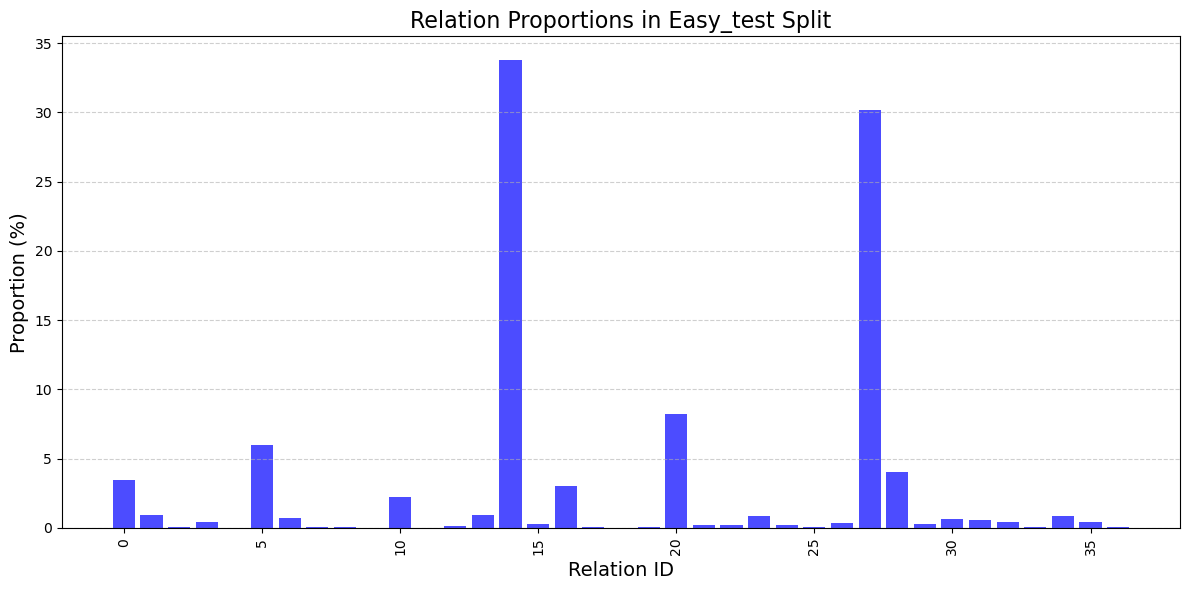

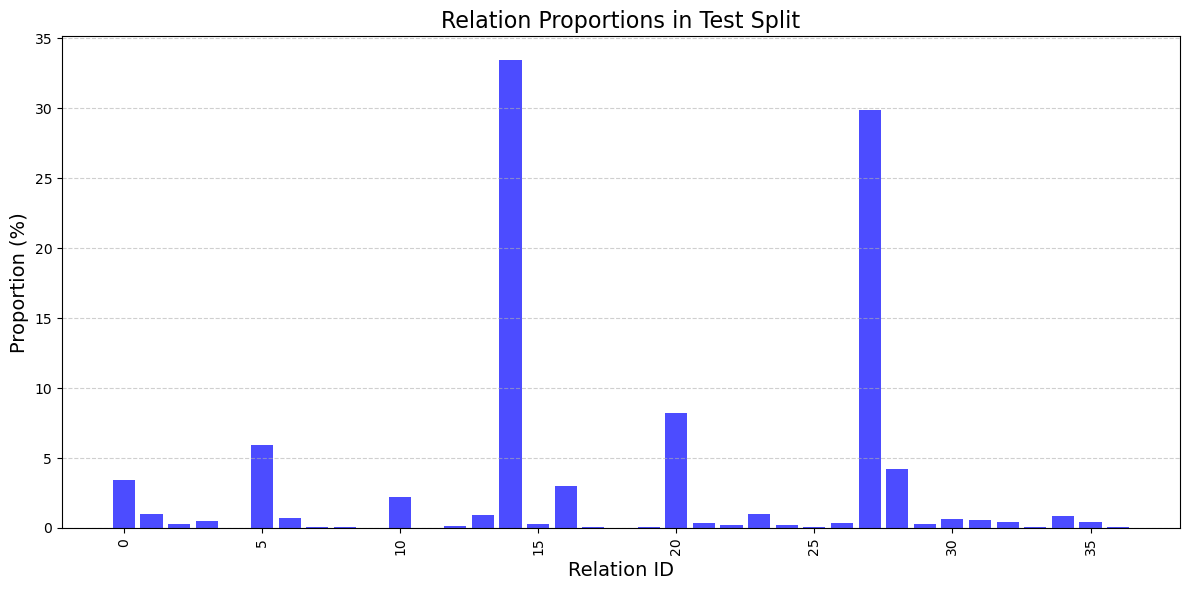

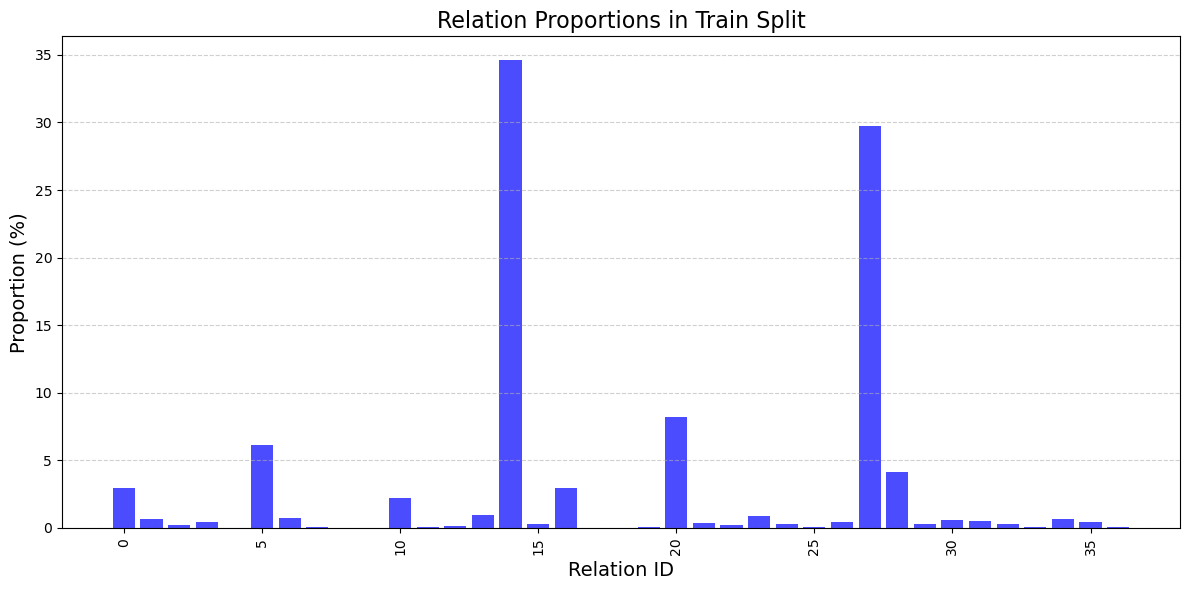

In [60]:
x = analyze_splits(ood_test, easy_test, test, train)

plot_all_splits(x)